# K-means clustering problem using Python
# Exercise 1: Data Exploration and Preprocessing

   CustomerID  Age  AnnualIncome  SpendingScore
0           1   22         15000             39
1           2   35         40000             81
2           3   26         30000             77
3           4   40         50000             40
4           5   55        100000              6
CustomerID       0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64


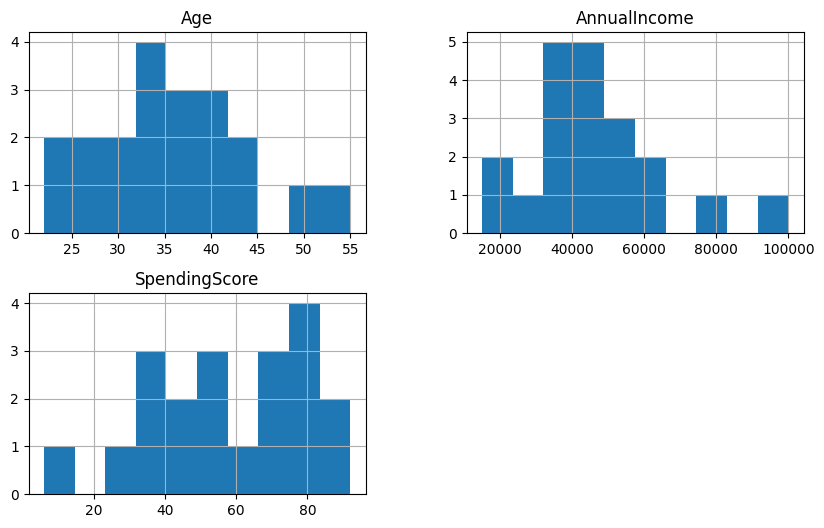

   CustomerID  Age  AnnualIncome  SpendingScore IncomeCategory
0           1   22         15000             39            Low
1           2   35         40000             81         Medium
2           3   26         30000             77         Medium
3           4   40         50000             40         Medium
4           5   55        100000              6           High


In [ ]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('customer_segmentation.csv')

# Display first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Data exploration - Histograms for Age, Annual Income, and Spending Score
df[['Age', 'AnnualIncome', 'SpendingScore']].hist(bins=10, figsize=(10, 6))
plt.show()

# Data Normalization using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Age', 'AnnualIncome', 'SpendingScore']])

# Convert the scaled data back into a DataFrame
df_scaled = pd.DataFrame(scaled_data, columns=['Age', 'AnnualIncome', 'SpendingScore'])

# Adding a new column for Income Category based on Annual Income
def income_category(income):
    if income < 30000:
        return 'Low'
    elif 30000 <= income < 70000:
        return 'Medium'
    else:
        return 'High'

df['IncomeCategory'] = df['AnnualIncome'].apply(income_category)

# Display the modified DataFrame
print(df.head())

# Exercise 2: Implementing K-Means Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


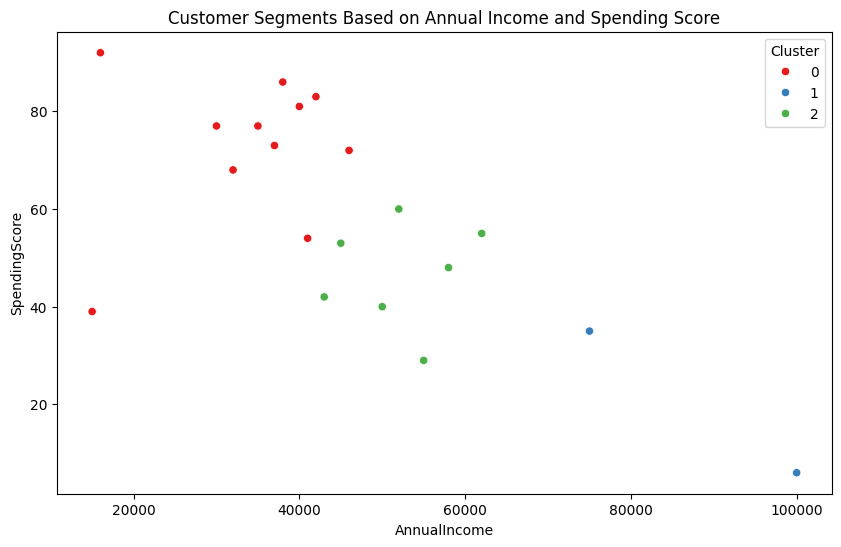

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

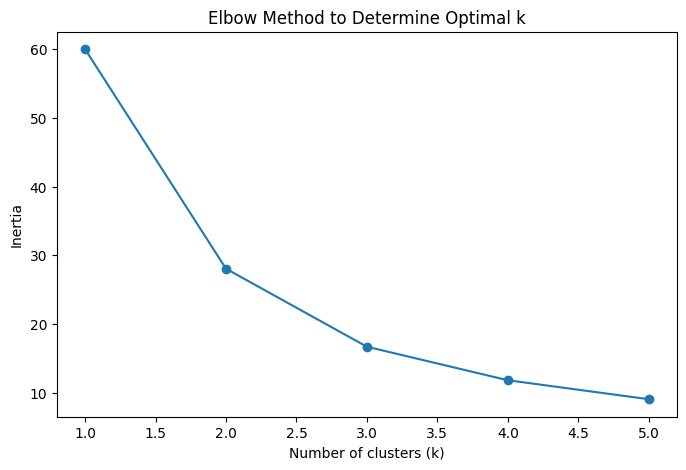

In [ ]:
from sklearn.cluster import KMeans
# Initial model implementation with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)
# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AnnualIncome', y='SpendingScore', hue='Cluster', data=df, palette='Set1')
plt.title('Customer Segments Based on Annual Income and Spending Score')
plt.show()
# Elbow Method to determine the optimal k
inertia = []
k_values = range(1, 6)
for k in k_values:
     kmeans = KMeans(n_clusters=k, random_state=42)
     kmeans.fit(df_scaled)
     inertia.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Exercise 3: Model Evaluation

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

For k=2, the silhouette score is 0.431
For k=3, the silhouette score is 0.396
For k=4, the silhouette score is 0.402
For k=5, the silhouette score is 0.350


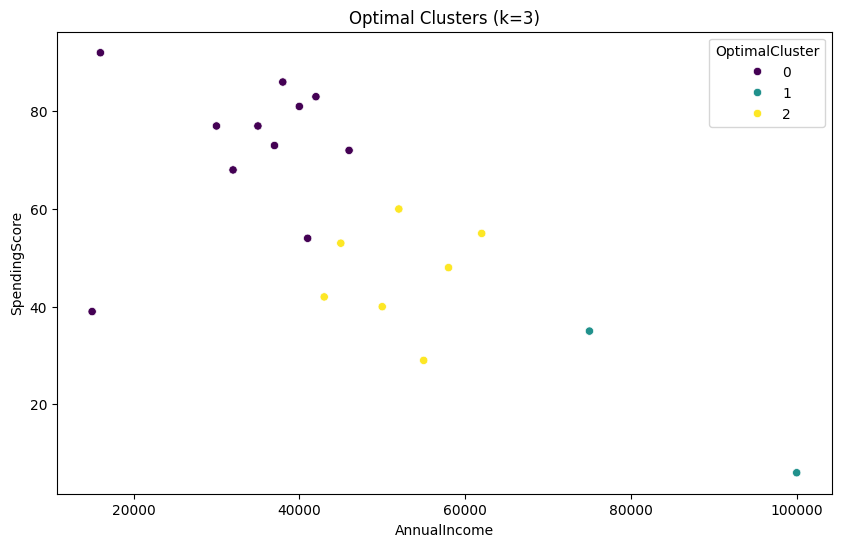

                AnnualIncome  SpendingScore
OptimalCluster                             
0               33818.181818      72.909091
1               87500.000000      20.500000
2               52142.857143      46.714286


In [ ]:
# Calculate silhouette scores for different values of k
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, clusters)
    print(f'For k={k}, the silhouette score is {silhouette_avg:.3f}')

# Based on the silhouette score and elbow method, let's assume k=3 is optimal
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['OptimalCluster'] = kmeans.fit_predict(df_scaled)

# Visualizing the optimal clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AnnualIncome', y='SpendingScore', hue='OptimalCluster', data=df, palette= 'viridis')
plt.title(f'Optimal Clusters (k={optimal_k})')
plt.show()

# Cluster analysis by averaging specific features for each cluster
cluster_summary = df.groupby('OptimalCluster')[['AnnualIncome', 'SpendingScore']].mean()
print(cluster_summary)
